In [1]:
#coding:utf-8
import tushare as ts
from datetime import datetime,timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
%matplotlib inline

In [3]:
market_today = ts.get_today_all()

[Getting data:]############################################################

In [4]:
by_amount = market_today.sort_values(by = 'amount',ascending = False)[:800]
by_percent = market_today.sort_values(by = 'changepercent',ascending = False)[:800]

by_percent

In [5]:
all_stock = ts.get_stock_basics()

In [6]:
industry_list = list(all_stock['industry'])
industry = set(industry_list)
#print(len(industry))
#print(industry)

In [6]:
def numbers_industry():
    #count number of very industry 
    industry_list = list(all_stock['industry'])
    industries = set(industry_list)
    numbers_dict = {}
    for i in industries:
        companies = all_stock[all_stock['industry'] == i]
        num = len(companies)
        numbers_dict[i] = num
    return numbers_dict

In [7]:
def count_industry(information):
    #input a group of codes ,and count thier industry number
    industry_list = []
    for i in list(information['code']):
        industry = all_stock[all_stock.index == i]['industry'].values
        industry_list.append(list(industry)[0])
    count_basic = []
    for i in industry_list:
        if i not in count_basic:
            count_basic.append(i)

    count_dict2= {}
    for i in count_basic:
        count = industry_list.count(i)
        count_dict2[i] = count
    return count_dict2

In [8]:
def count_industry2(information_df):
    #improve (upgrade) for counting amount in industry
    industry_dict = {}
    amount_dict = {}
    for i in list(information_df['code']):
        industry = all_stock[all_stock.index == i]['industry'].values
        #industry_list.append(list(industry)[0])
        industry_dict[i] = list(industry)[0]           #e.g {'000001': '银行','000006': '区域地产','000023': '其他建材',}
        amount = list(information_df[information_df['code']==i]['amount'])[0]
        amount_dict[i] = amount
    count_basic = []  #a list of name of industry
    for i in list(industry_dict.values()):
        if i not in count_basic:
            count_basic.append(i)

    codes_combi = {
        'industry':pd.Series(industry_dict,index = list(industry_dict.keys())),
        'amount':pd.Series(amount_dict,index = list(amount_dict.keys()))
    }
    codes_df = pd.DataFrame(codes_combi)
    
    
    count_dict2= {}      #a dict of number of every industy
    amount_of_industry = {}   #a dict of total amount of every industry
    for i in count_basic:
        #count = list(industry_dict.values()).count(i)
        count = len(codes_df[codes_df['industry'] == i])
        count_dict2[i] = count
        amounts = codes_df[codes_df['industry'] == i]['amount'].sum()
        amount_of_industry[i] = amounts
        
        
    return count_dict2,amount_of_industry
    
    

count_industry2(by_percent)

test_dict = count_industry2(by_percent)  # when return count_dict2 only
test_dict2= count_industry(by_percent)
set(test_dict) == set(test_dict2)

In [9]:
count_percent,amount_percent = count_industry2(by_percent)

In [10]:
count_vol,amount_vol = count_industry2(by_amount)

all_industry = {}
for i in industry:
    count = industry_list.count(i)
    all_industry[i] = count
#print(all_industry)
#print(sum(all_industry.values()),'of',len(industry_list))

count_amount = count_industry(by_amount)
count_amount

names =[]
values = []
for i,k in count_amount.items():
    if k >5:
        names.append(i)
        values.append(k)

In [26]:
def make_plot(code_dict,bias = 10):
    names =[]
    values = []
    for i,k in code_dict.items():
        if k >bias:
            names.append(i)
            values.append(k)
    plt.rcParams['font.sans-serif']=['SimHei']   #正常显示中文
    plt.rcParams['axes.unicode_minus']=False
    #plt.style.use('fivethirtyeight')
    fig,ax = plt.subplots(figsize=(12, 7.5))
    #fig(figsize = (10,6))
    ax.barh(names,values)
    #ax.set(xlabel = '股票个数',ylabel='行业',title ='各行业上榜数量')

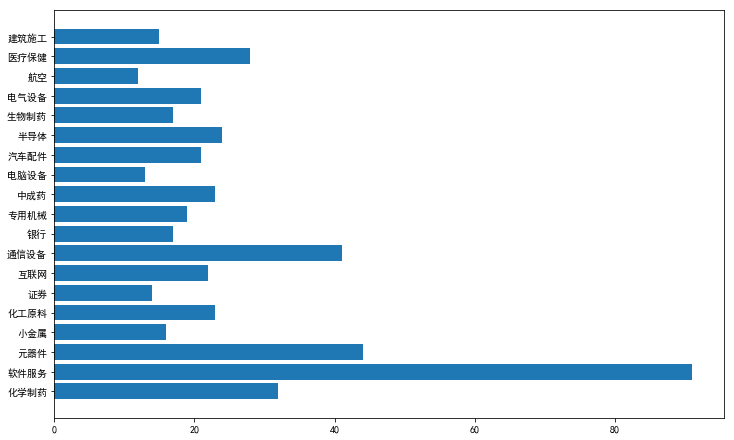

In [27]:
make_plot(count_vol)

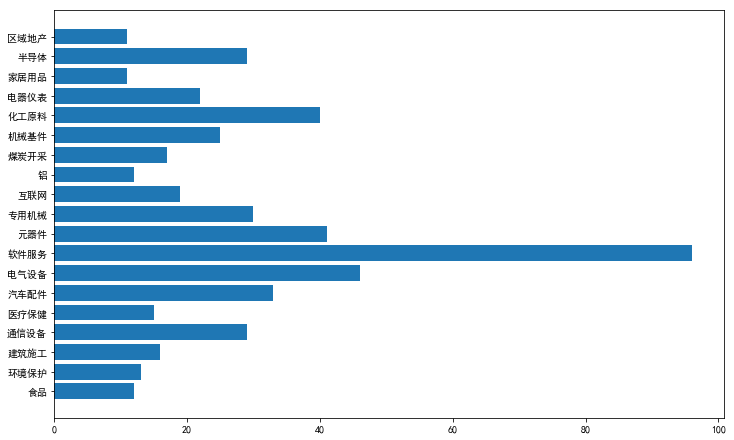

In [28]:
make_plot(count_percent)

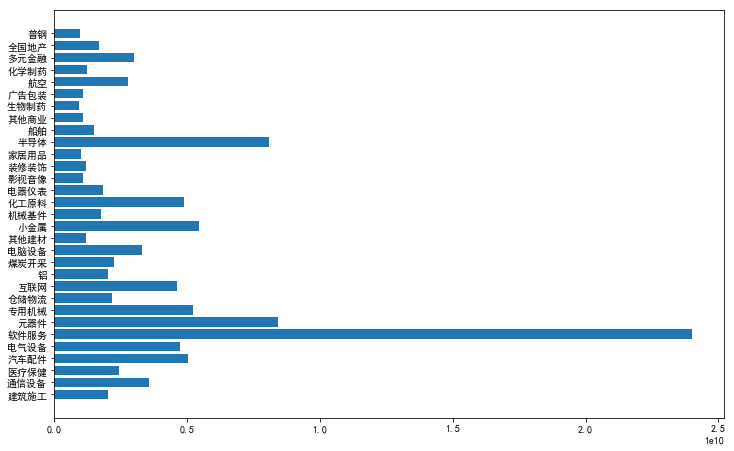

In [29]:
make_plot(amount_percent,900000000)

In [22]:
numbers_dict = numbers_industry()
#sum(numbers_dict.values())

3514